In [37]:
# Standard libraries
import sys

# 3rd party libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import Delaunay
import SimpleITK as sitk

# Our libraries
#sys.path.append('../../')
#from gui.gui_shared import auto_contrast

## Show correspondences

Moving points shape: (790120, 3)
[[  1.  73. 216.]
 [  1.  73. 216.]
 [  1.  74. 216.]
 ...
 [526. 284. 271.]
 [526. 284. 272.]
 [526. 284. 272.]]

Fixed points shape: (790120, 3)
[[  1. 176. 230.]
 [  1. 177. 230.]
 [  1. 178. 231.]
 ...
 [526. 274. 261.]
 [526. 274. 262.]
 [526. 274. 263.]]

Turning moving points to a set, set size: 389967
Turning fixed points to a set, set size: 790120

Checking slice 350
Number of moving points for slice 350 : 2484
Number of unique moving points for slice 350 : 1326

[[ 17 178]
 [ 17 179]
 [ 18 172]
 ...
 [271 355]
 [271 357]
 [271 357]]
Number of fixed points for slice 350 : 2484
Number of unique fixed points for slice 350 : 2484

[[ 10 173]
 [ 10 174]
 [ 10 175]
 ...
 [270 355]
 [270 356]
 [270 357]]


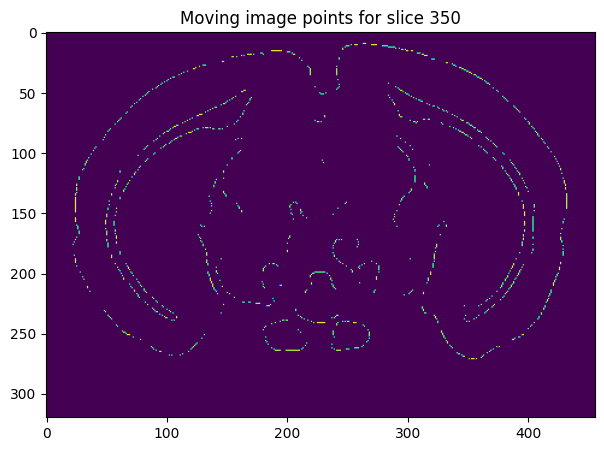

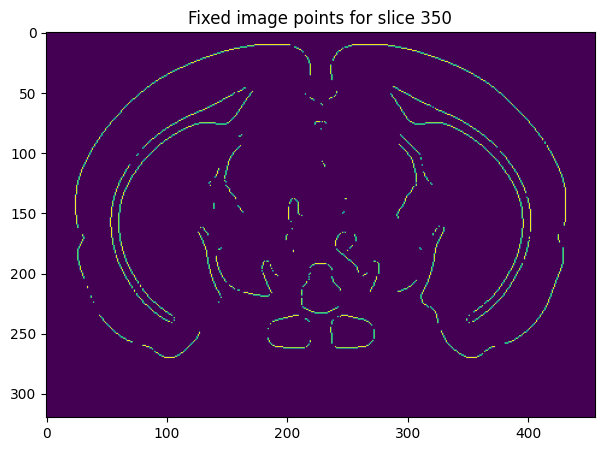

In [38]:
folder_name = "1_3i"

# Load in the moving and fixed points
mpoints_path = folder_name + "/mpoints.npy"
fpoints_path = folder_name + "/fpoints.npy"
mpoints = np.load(mpoints_path)
fpoints = np.load(fpoints_path)

# Print out the moving and fixed point information
print("Moving points shape:", mpoints.shape)
print(mpoints)
print("\nFixed points shape:", fpoints.shape)
print(fpoints)

# Turn the moving and fixed points into sets to remove duplicates
mpoints_set = set([tuple(p) for p in mpoints])
fpoints_set = set([tuple(p) for p in fpoints])
print("\nTurning moving points to a set, set size:", len(mpoints_set))
print("Turning fixed points to a set, set size:", len(fpoints_set))

# Rescaled height, width, and z
width = 456
height = 320
z = 528

# Create a binary image to show the correspondences
curr_idx = 350
print("\nChecking slice", curr_idx)

# Get relevant moving image points
curr_mpoints = np.array([point[1:] for point in mpoints if point[0] == curr_idx])
curr_mpoints = curr_mpoints.astype(int)
curr_mpoints_unique = np.unique(curr_mpoints, axis=0)
print("Number of moving points for slice", curr_idx, ":", len(curr_mpoints))
print("Number of unique moving points for slice", curr_idx, ":", len(curr_mpoints_unique))
print()
print(curr_mpoints)

# Get relevant moving image points
curr_fpoints = np.array([point[1:] for point in fpoints if point[0] == curr_idx])
curr_fpoints = curr_fpoints.astype(int)
curr_fpoints_unique = np.unique(curr_fpoints, axis=0)
print("Number of fixed points for slice", curr_idx, ":", len(curr_fpoints))
print("Number of unique fixed points for slice", curr_idx, ":", len(curr_fpoints_unique))
print()
print(curr_fpoints)

# Fill in binary image
binary_image_moving = np.zeros((height, width), dtype=bool)
binary_image_fixed = np.zeros((height, width), dtype=bool)
for point in curr_mpoints:
    binary_image_moving[point[0], point[1]] = 1
for point in curr_fpoints:
    binary_image_fixed[point[0], point[1]] = 1
    
# Show binary image
plt.figure(figsize=(10, 5))
plt.imshow(binary_image_moving, cmap='viridis')
plt.title('Moving image points for slice ' + str(curr_idx))
plt.show()

# Show binary image
plt.figure(figsize=(10, 5))
plt.imshow(binary_image_fixed, cmap='viridis')
plt.title('Fixed image points for slice ' + str(curr_idx))
plt.show()

### Plot Delauany triangulation
Perform Delaunay triangulation on moving points and show the triangulation

In [46]:
curr_points = curr_mpoints  # The set of points to triangulate on

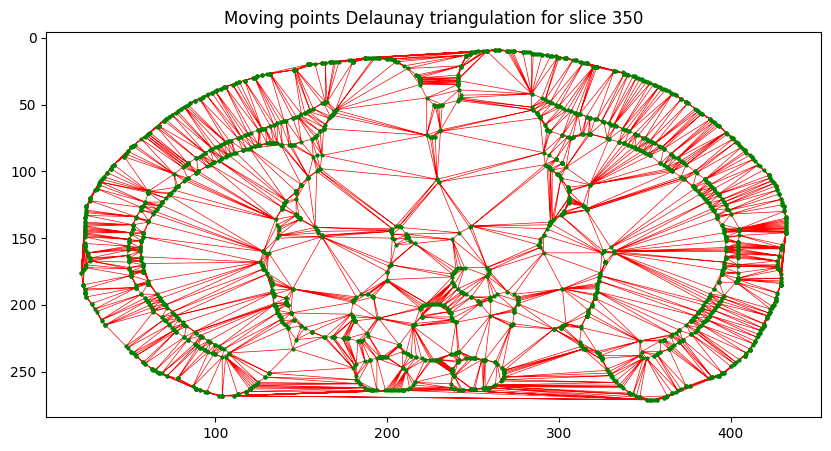

In [48]:
# Do triangulation on moving points and show it on moving points
tri = Delaunay(curr_points)

# Plot the Delaunay triangulation
plt.figure(figsize=(10, 5))
plt.triplot(tri.points[:, 1], tri.points[:, 0], tri.simplices, color='red', linewidth=0.5)
plt.plot(tri.points[:, 1], tri.points[:, 0], 'go', markersize=2)
plt.gca().invert_yaxis()  # Invert the y-axis
plt.title('Moving points Delaunay triangulation for slice ' + str(curr_idx))
plt.show()

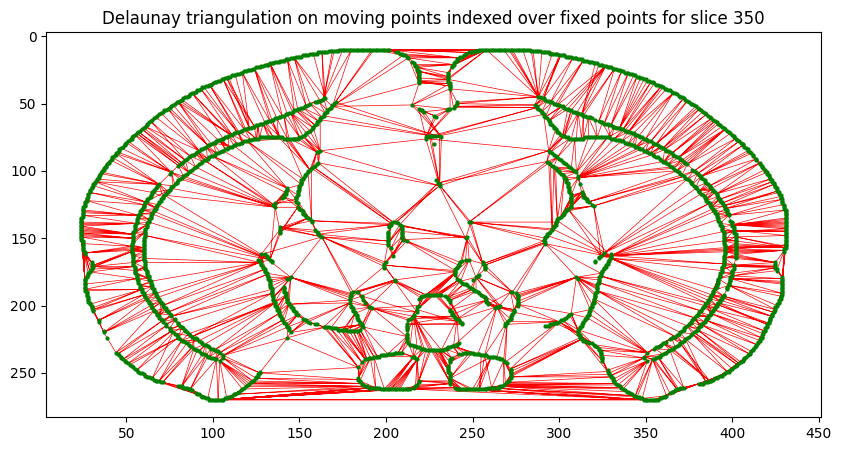

In [49]:
# Do triangulation on moving points and show it on fixed points
plt.figure(figsize=(10, 5))
plt.triplot(curr_fpoints[:, 1], curr_fpoints[:, 0], tri.simplices, color='red', linewidth=0.5)
plt.plot(curr_fpoints[:, 1], curr_fpoints[:, 0], 'go', markersize=2)
plt.gca().invert_yaxis()  # Invert the y-axis
plt.title('Delaunay triangulation on moving points indexed over fixed points for slice ' + str(curr_idx))
plt.show()

Try an example Delaunay triangulation where I swap some indexes around

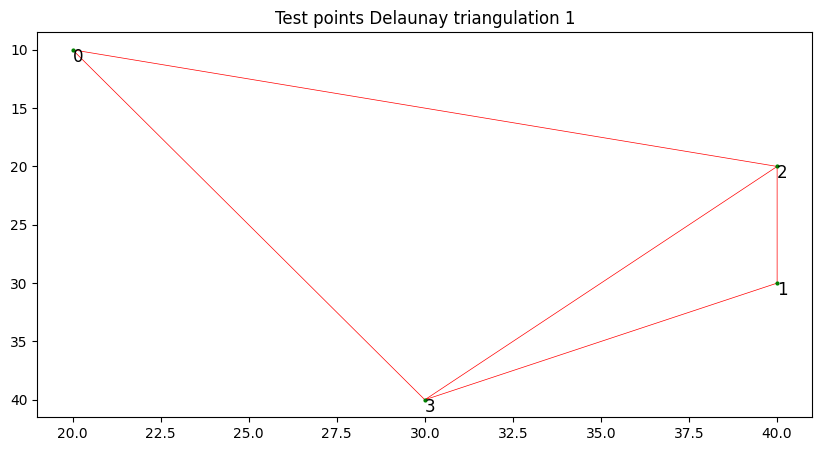

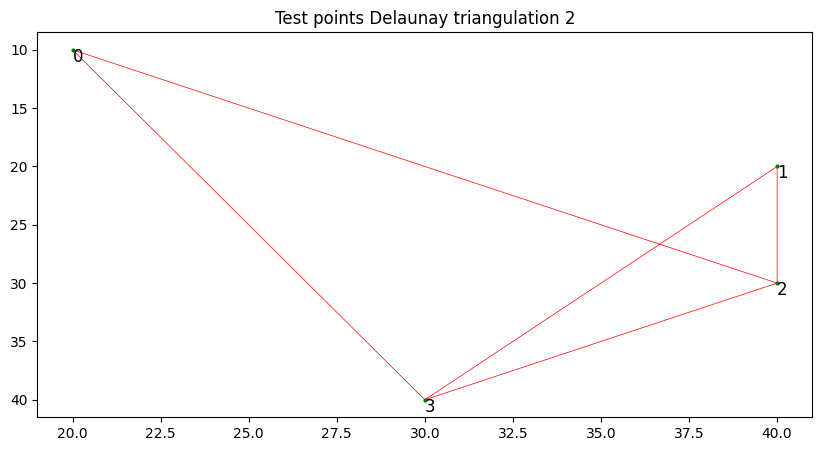

array([[1, 2, 3],
       [3, 2, 0]], dtype=int32)

In [64]:
test_pts = np.array([
    [10, 20],  # 1
    [30, 40],  # 2
    [20, 40],  # 3
    [40, 30]]) # 4

triang = Delaunay(test_pts)

plt.figure(figsize=(10, 5))
plt.plot(test_pts[:, 1], test_pts[:, 0], 'go', markersize=2)
for i in range(len(test_pts)):
    pt = test_pts[i]
    plt.text(pt[1], pt[0] + 1, str(i), fontsize=12)
plt.triplot(test_pts[:, 1], test_pts[:, 0], triang.simplices, color='red', linewidth=0.5)
plt.gca().invert_yaxis()  # Invert the y-axis
plt.title('Test points Delaunay triangulation 1')
plt.show()

# Swap 2 and 3 around
test_pts_2 = np.array([
    [10, 20],   # 1    
    [20, 40],   # 3
    [30, 40],   # 2
    [40, 30]])  # 4

plt.figure(figsize=(10, 5))
plt.plot(test_pts_2[:, 1], test_pts_2[:, 0], 'go', markersize=2)
for i in range(len(test_pts_2)):
    pt = test_pts_2[i]
    plt.text(pt[1], pt[0] + 1, str(i), fontsize=12)
plt.triplot(test_pts_2[:, 1], test_pts_2[:, 0], triang.simplices, color='red', linewidth=0.5)
plt.gca().invert_yaxis()  # Invert the y-axis
plt.title('Test points Delaunay triangulation 2')
plt.show()

triang.simplices